In [5]:
import yfinance as yf
# Especifique o símbolo da empresa que você vai trabalhar
# Configure data de início e fim da sua base
symbol = 'BB'
start_date = '2015-01-01'
end_date = '2025-01-20'
# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BB,BB,BB,BB,BB
Date,,,,,
2015-01-02,10.82,11.11,10.79,11.01,9733200
2015-01-05,10.76,10.77,10.37,10.60,12318100
2015-01-06,10.62,10.85,10.44,10.80,10176400
2015-01-07,10.67,10.80,10.48,10.65,10277400
2015-01-08,10.63,10.78,10.57,10.75,6868300


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BB,BB,BB,BB,BB
count,2527.000000,2527.000000,2527.000000,2527.000000,2.527000e+03
mean,7.209327,7.365263,7.071318,7.218852,8.884170e+06
std,2.841360,2.941817,2.765853,2.855102,2.174563e+07
min,2.110000,2.190000,2.010000,2.010000,1.054900e+06
25%,4.855000,4.970000,4.770000,4.870000,3.526650e+06
50%,7.210000,7.330000,7.110000,7.210000,5.255200e+06
75%,9.370000,9.520000,9.250000,9.375000,8.207900e+06
max,25.100000,28.770000,19.809999,20.250000,5.367394e+08


In [8]:
# Criando uma primeira LSTM de teste

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare os dados
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Divida os dados em conjuntos de treinamento e teste
train_data_len = int(len(data) * 0.8)
train_data = data[0:train_data_len, :]
test_data = data[train_data_len:, :]

# Crie a estrutura de dados para o modelo LSTM
def create_dataset(dataset, look_back=60):
  X, Y = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

look_back = 60
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Remodele os dados de entrada para serem [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Crie e treine o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Faça previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverta a escala para obter os valores originais
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Epoch 1/10


c:\Users\andra\Trabalho Fase 4\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0183
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0015
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0014
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.0484e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.8503e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.5719e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.9192e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.3487e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.1827e-04
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Epoch 1/50


C:\Users\andra\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0134
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0022
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0011
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0017
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0011
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0012
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0011
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0010
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0011
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 9.9602e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 7.0680e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 8.5710e-04
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 8.9958e-04
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 7.8688e-04
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 7.

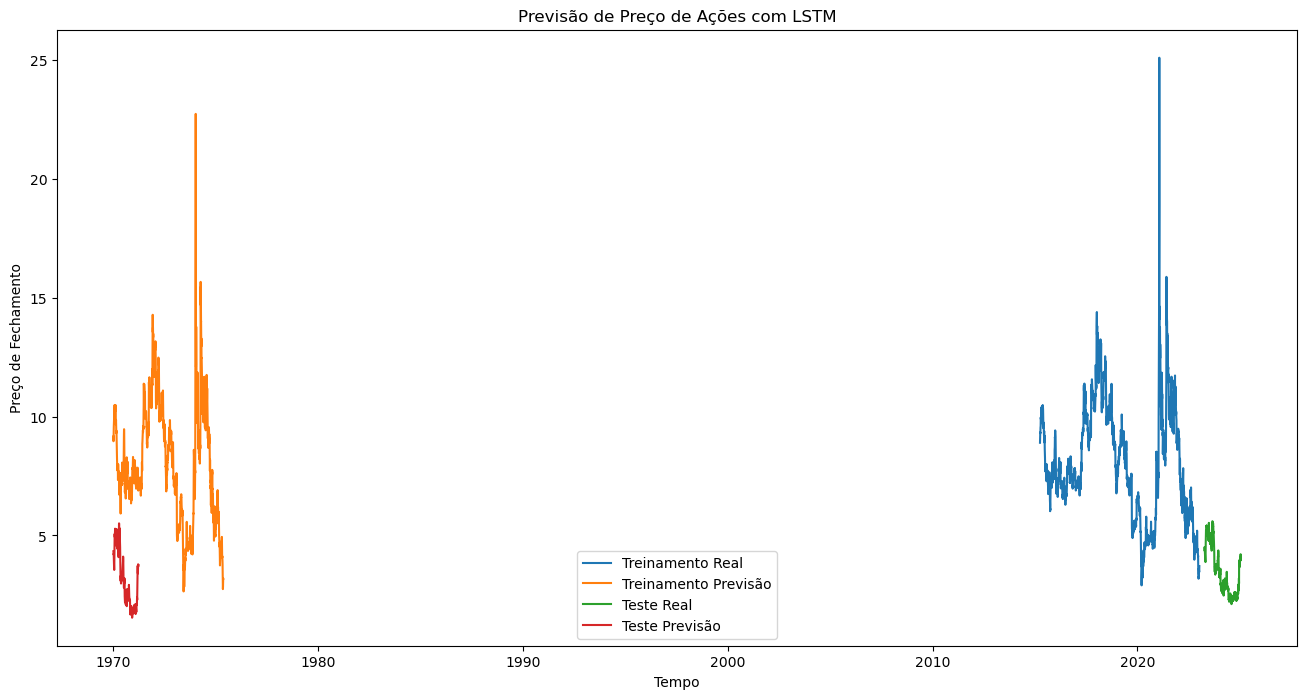

In [26]:
# Aprimorando o modelo (aumentando as epocas e ajustando parametros)

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare os dados
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Divida os dados em conjuntos de treinamento e teste
train_data_len = int(len(data) * 0.8)
train_data = data[0:train_data_len, :]
test_data = data[train_data_len:, :]

# Estrutura de dados para o modelo LSTM
def create_dataset(dataset, look_back=60):
  X, Y = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

look_back = 60  # Aumentando o look_back para capturar mais informações históricas
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Remodelando os dados de entrada
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adicionando dropout para evitar overfitting
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=32)  # Aumente o número de epochs

# Previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Mudando a escala para obter os valores originais
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculando o RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Plotagem dos resultados
plt.figure(figsize=(16, 8))
plt.plot(df['Close'][look_back+1:train_data_len], label='Treinamento Real')
plt.plot(train_predict, label='Treinamento Previsão')
plt.plot(df['Close'][train_data_len + look_back + 1:], label='Teste Real')
plt.plot(test_predict, label='Teste Previsão')
plt.title('Previsão de Preço de Ações com LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


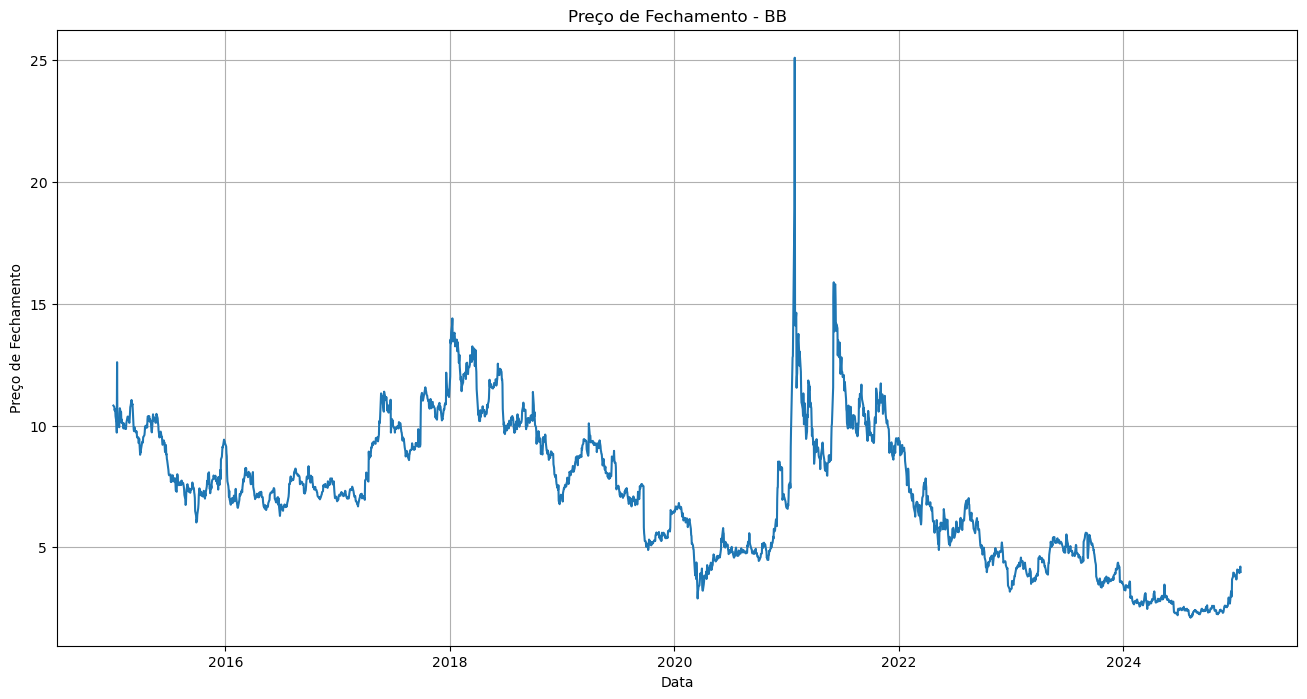

In [27]:
# Plotagem do gráfico da coluna "Close" para identificar outliers
plt.figure(figsize=(16, 8))
plt.plot(df['Close'])
plt.title('Preço de Fechamento - ' + symbol)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

In [28]:
# pela presença de outliers entre 2020 e 2022, optamos por utilizar o MAE, já que sua sensibilidade a valores extremos é menor que o RMSE.

from sklearn.metrics import mean_absolute_error

# Calcula o MAE
train_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_mae = mean_absolute_error(Y_test[0], test_predict[:,0])

print('Train MAE:', train_mae)
print('Test MAE:', test_mae)

Train MAE: 0.24069293469798797
Test MAE: 0.3966660330804546


In [10]:
# Salvando o modelo treinado
modelo = model.save('stock_prediction_model.keras')

# Salvando o scaler para uso na API
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [12]:
from flask import Flask, request, jsonify, g
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pickle
import requests
import time
from werkzeug.serving import run_simple

app = Flask(__name__)

# Carrega o modelo treinado
model = tf.keras.models.load_model('stock_prediction_model.keras')

# Carrega o scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

request_counts = {}
@app.before_request
def before_request():
    g.start = time.time()
    global request_counts
    if request.path not in request_counts:
        request_counts[request.path] = 0
    request_counts[request.path] += 1

@app.after_request
def after_request(response):
    diff = time.time() - g.start
    print(f"Request to {request.path} took {diff:.4f} seconds")
    return response

@app.route('/metrics', methods=['GET'])
def metrics():
    return jsonify(request_counts)
    
@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({'status': 'OK'}), 200

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        historical_prices = data['historical_prices']

        # Prepara os dados de entrada
        input_data = np.array(historical_prices).reshape(-1, 1)
        input_data = scaler.transform(input_data)

        # Faz a previsão
        look_back = 30 
        if len(input_data) < look_back:
            return jsonify({'error': 'Insufficient historical data'}), 400

        X_input = np.reshape(input_data[-look_back:], (1, look_back, 1))
        prediction = model.predict(X_input)

        # Inverte a escala para obter o valor real
        prediction = scaler.inverse_transform(prediction)

        return jsonify({'prediction': prediction[0][0]})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000
Press CTRL+C to quit
127.0.0.1 - - [23/Mar/2025 11:51:43] "GET /health HTTP/1.1" 200 -


Request to /health took 0.0000 seconds


127.0.0.1 - - [23/Mar/2025 11:52:09] "GET /metrics HTTP/1.1" 200 -


Request to /metrics took 0.0000 seconds
